In [137]:
# !pip install ucimlrepo

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, pointbiserialr, mannwhitneyu, ttest_ind
import warnings
from ucimlrepo import fetch_ucirepo

In [139]:
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

In [140]:
adult = fetch_ucirepo(id=2)

In [141]:
X = adult.data.features
y = adult.data.targets

In [142]:
adult.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

In [143]:
adult.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,N/A,None,no
1,workclass,Feature,Categorical,Income,"Private, Self-emp-not-inc, Self-emp-inc, Feder...",None,yes
2,fnlwgt,Feature,Integer,None,None,None,no
3,education,Feature,Categorical,Education Level,"Bachelors, Some-college, 11th, HS-grad, Prof-...",None,no
4,education-num,Feature,Integer,Education Level,None,None,no
5,marital-status,Feature,Categorical,Other,"Married-civ-spouse, Divorced, Never-married, S...",None,no
6,occupation,Feature,Categorical,Other,"Tech-support, Craft-repair, Other-service, Sal...",None,yes
7,relationship,Feature,Categorical,Other,"Wife, Own-child, Husband, Not-in-family, Other...",None,no
8,race,Feature,Categorical,Race,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,...",None,no
9,sex,Feature,Binary,Sex,"Female, Male.",None,no


In [144]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [145]:
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [146]:
objetivo_conteo = y['income'].value_counts()
objetivo_pct = y['income'].value_counts(normalize=True) * 100
for idx, (count, pct) in enumerate(zip(objetivo_conteo, objetivo_pct)):
    print(f"{objetivo_conteo.index[idx]}: {count:,} ({pct:.2f}%)")

<=50K: 24,720 (50.61%)
<=50K.: 12,435 (25.46%)
>50K: 7,841 (16.05%)
>50K.: 3,846 (7.87%)


In [147]:
y['income'] = y['income'].str.rstrip('.')

In [148]:
objetivo_conteo = y['income'].value_counts()
objetivo_pct = y['income'].value_counts(normalize=True) * 100
for idx, (count, pct) in enumerate(zip(objetivo_conteo, objetivo_pct)):
    print(f"{objetivo_conteo.index[idx]}: {count:,} ({pct:.2f}%)")

<=50K: 37,155 (76.07%)
>50K: 11,687 (23.93%)


In [149]:
categorical_vars = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
numerical_vars = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [150]:
data = pd.concat([X, y], axis=1)

In [151]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [152]:
data.shape

(48842, 15)

In [153]:
missing = data.isnull().sum()
missing_pct = (missing / len(data)) * 100
missing_df = pd.DataFrame({
    'Variable': missing.index,
    'Valores Faltantes': missing.values,
    'Porcentaje (%)': missing_pct.values
}).sort_values('Valores Faltantes', ascending=False)

In [154]:
missing_df

,Variable,Valores Faltantes,Porcentaje (%)
6,occupation,966,1.977806
1,workclass,963,1.971664
13,native-country,274,0.560993
0,age,0,0.000000
2,fnlwgt,0,0.000000
3,education,0,0.000000
4,education-num,0,0.000000
5,marital-status,0,0.000000
7,relationship,0,0.000000
8,race,0,0.000000


In [155]:
missing_df[missing_df['Valores Faltantes'] > 0]

,Variable,Valores Faltantes,Porcentaje (%)
6,occupation,966,1.977806
1,workclass,963,1.971664
13,native-country,274,0.560993


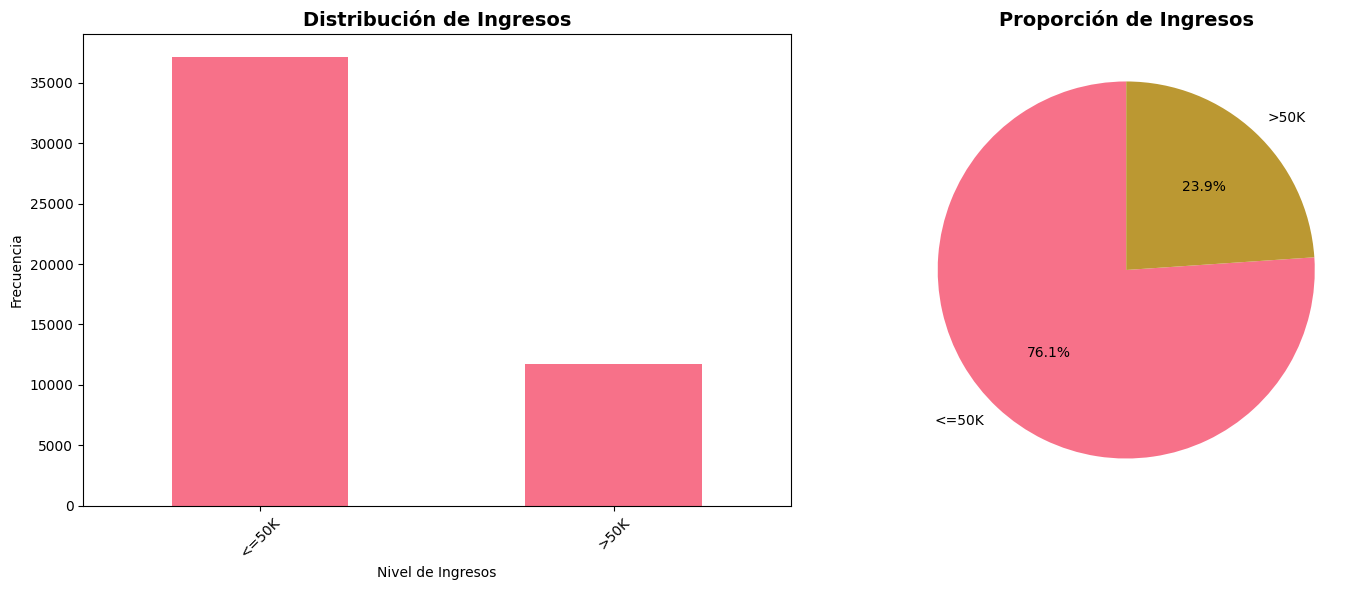

In [156]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
objetivo_conteo.plot(kind='bar', ax=ax1)
ax1.set_title('Distribución de Ingresos', fontsize=14, fontweight='bold')
ax1.set_xlabel('Nivel de Ingresos')
ax1.set_ylabel('Frecuencia')
ax1.tick_params(axis='x', rotation=45)

# Gráfico de pastel
ax2.pie(objetivo_conteo.values, labels=objetivo_conteo.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Proporción de Ingresos', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [157]:
minority_class = objetivo_conteo.min()
majority_class = objetivo_conteo.max()
print(majority_class / minority_class)

3.179173440574998


Este dataset esta bastante desbalanceado hacia los ingresos menores o iguales a 50K

In [158]:
numerical_data = data[numerical_vars]
desc_stats = numerical_data.describe()

In [159]:
y_encoded = (data['income'] == '>50K').astype(int)
correlations = {}
statistical_tests = {}

In [160]:
for var in numerical_vars:
    # Point-biserial correlation
    corr, p_value = pointbiserialr(y_encoded, data[var])
    correlations[var] = {'correlation': corr, 'p_value': p_value}

    # Mann-Whitney U test (no asume normalidad)
    group_low = data[data['income'] == '<=50K'][var]
    group_high = data[data['income'] == '>50K'][var]
    statistic, p_val_test = mannwhitneyu(group_low, group_high, alternative='two-sided')
    statistical_tests[var] = {'statistic': statistic, 'p_value': p_val_test}

    # Interpretación
    strength = abs(corr)
    if strength < 0.1:
        interpretation = "muy débil"
    elif strength < 0.3:
        interpretation = "débil"
    elif strength < 0.5:
        interpretation = "moderada"
    else:
        interpretation = "fuerte"

    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""

    print(f"   {var:15s}: r = {corr:6.3f} {significance} ({interpretation})")

   age            : r =  0.230 *** (débil)
   fnlwgt         : r = -0.006  (muy débil)
   education-num  : r =  0.333 *** (moderada)
   capital-gain   : r =  0.223 *** (débil)
   capital-loss   : r =  0.148 *** (débil)
   hours-per-week : r =  0.228 *** (débil)


In [161]:
sorted_vars = sorted(correlations.items(), key=lambda x: abs(x[1]['correlation']), reverse=True)
data_t = data.copy()
for i, (var, data_t) in enumerate(sorted_vars, 1):
    print(f"   {i}. {var}: |r| = {abs(data_t['correlation']):.3f}")

   1. education-num: |r| = 0.333
   2. age: |r| = 0.230
   3. hours-per-week: |r| = 0.228
   4. capital-gain: |r| = 0.223
   5. capital-loss: |r| = 0.148
   6. fnlwgt: |r| = 0.006


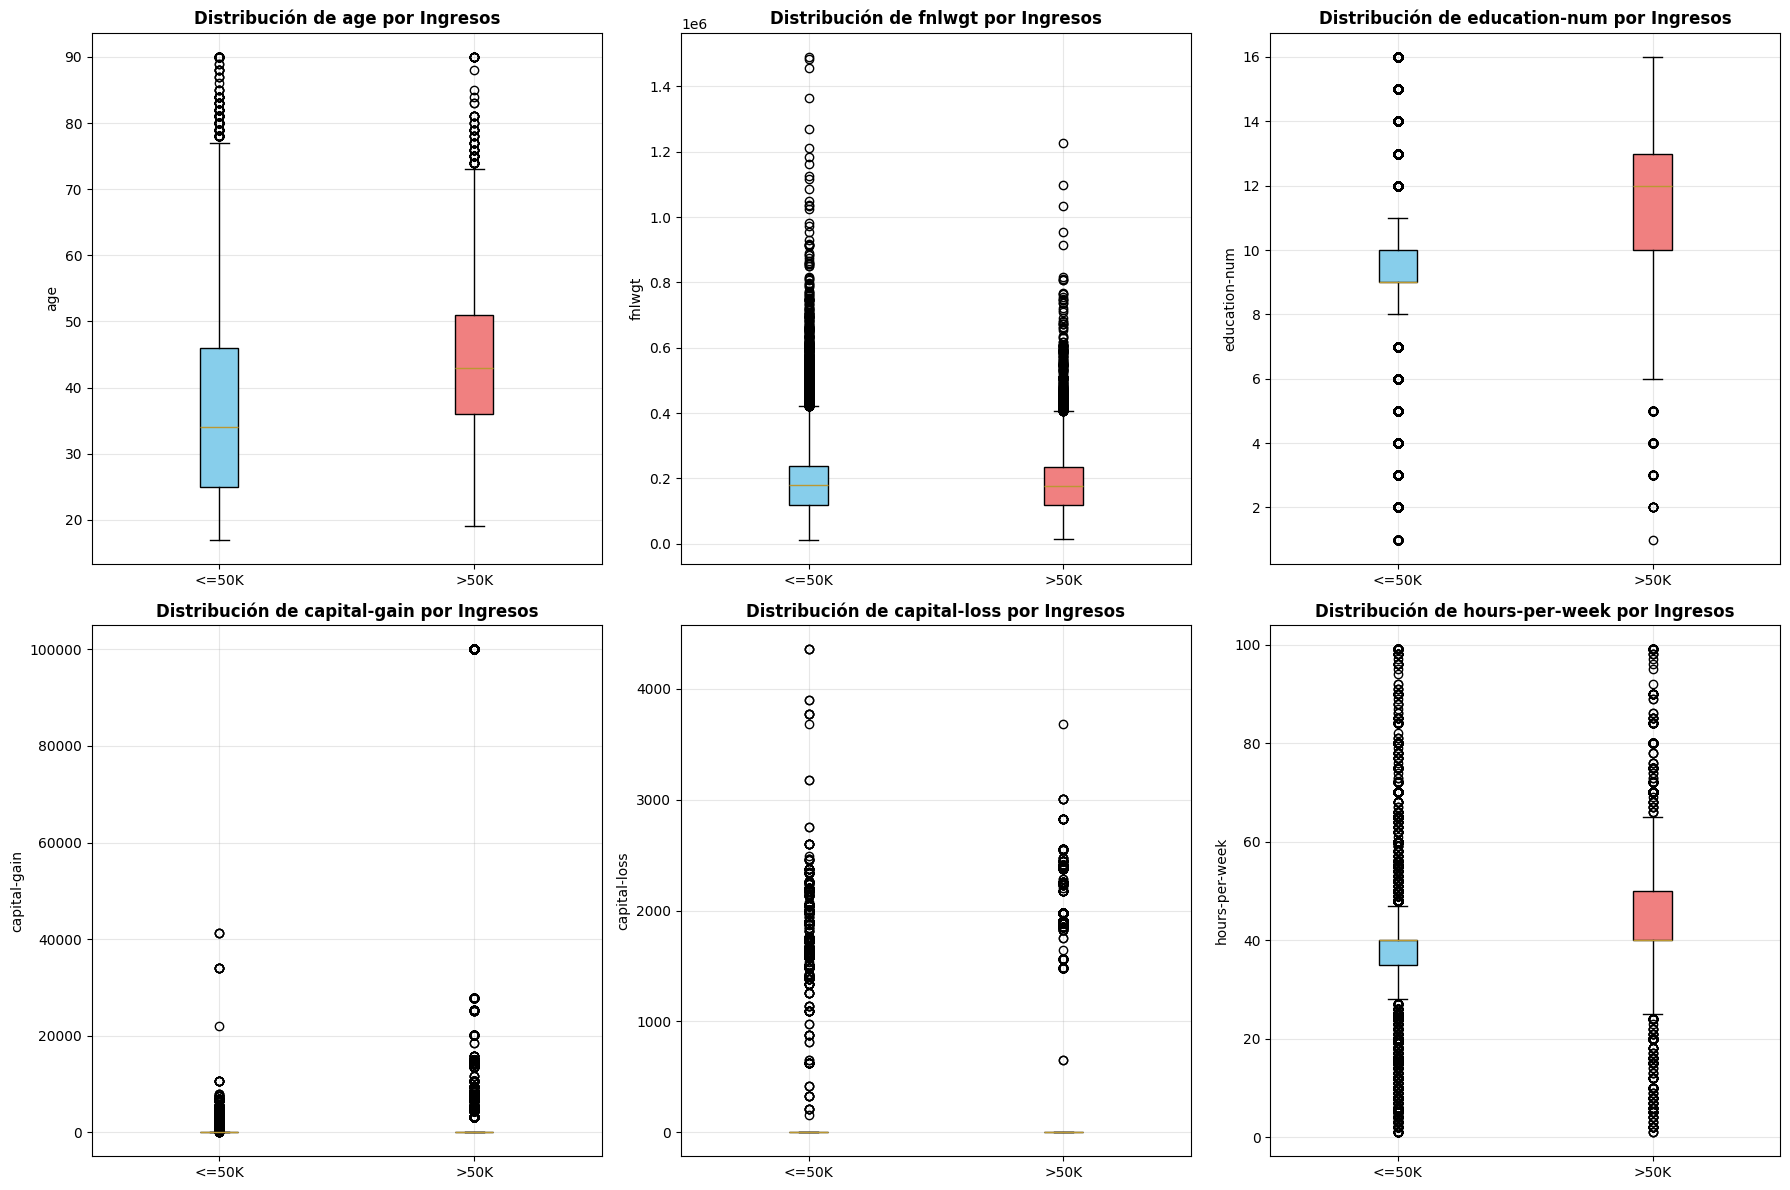

In [163]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, var in enumerate(numerical_vars):
    ax = axes[i]

    # Box plot comparativo
    data_to_plot = [
        data[data['income'] == '<=50K'][var],
        data[data['income'] == '>50K'][var]
    ]

    bp = ax.boxplot(data_to_plot, labels=['<=50K', '>50K'], patch_artist=True)
    bp['boxes'][0].set_facecolor('skyblue')
    bp['boxes'][1].set_facecolor('lightcoral')

    ax.set_title(f'Distribución de {var} por Ingresos', fontweight='bold')
    ax.set_ylabel(var)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [164]:
for var in categorical_vars:
    print(f"\n{var.upper()}:")
    value_counts = data[var].value_counts()
    print(f"Categorías únicas: {len(value_counts)}")
    print(f"Top 5 categorías:")
    print(value_counts.head())


WORKCLASS:
Categorías únicas: 9
Top 5 categorías:
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Name: count, dtype: int64

EDUCATION:
Categorías únicas: 16
Top 5 categorías:
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
Name: count, dtype: int64

MARITAL-STATUS:
Categorías únicas: 7
Top 5 categorías:
marital-status
Married-civ-spouse    22379
Never-married         16117
Divorced               6633
Separated              1530
Widowed                1518
Name: count, dtype: int64

OCCUPATION:
Categorías únicas: 15
Top 5 categorías:
occupation
Prof-specialty     6172
Craft-repair       6112
Exec-managerial    6086
Adm-clerical       5611
Sales              5504
Name: count, dtype: int64

RELATIONSHIP:
Categorías únicas: 6
Top 5 categorías:
relationship
Husband          19716
Not-in-family    12583
Own-child         7581
Un

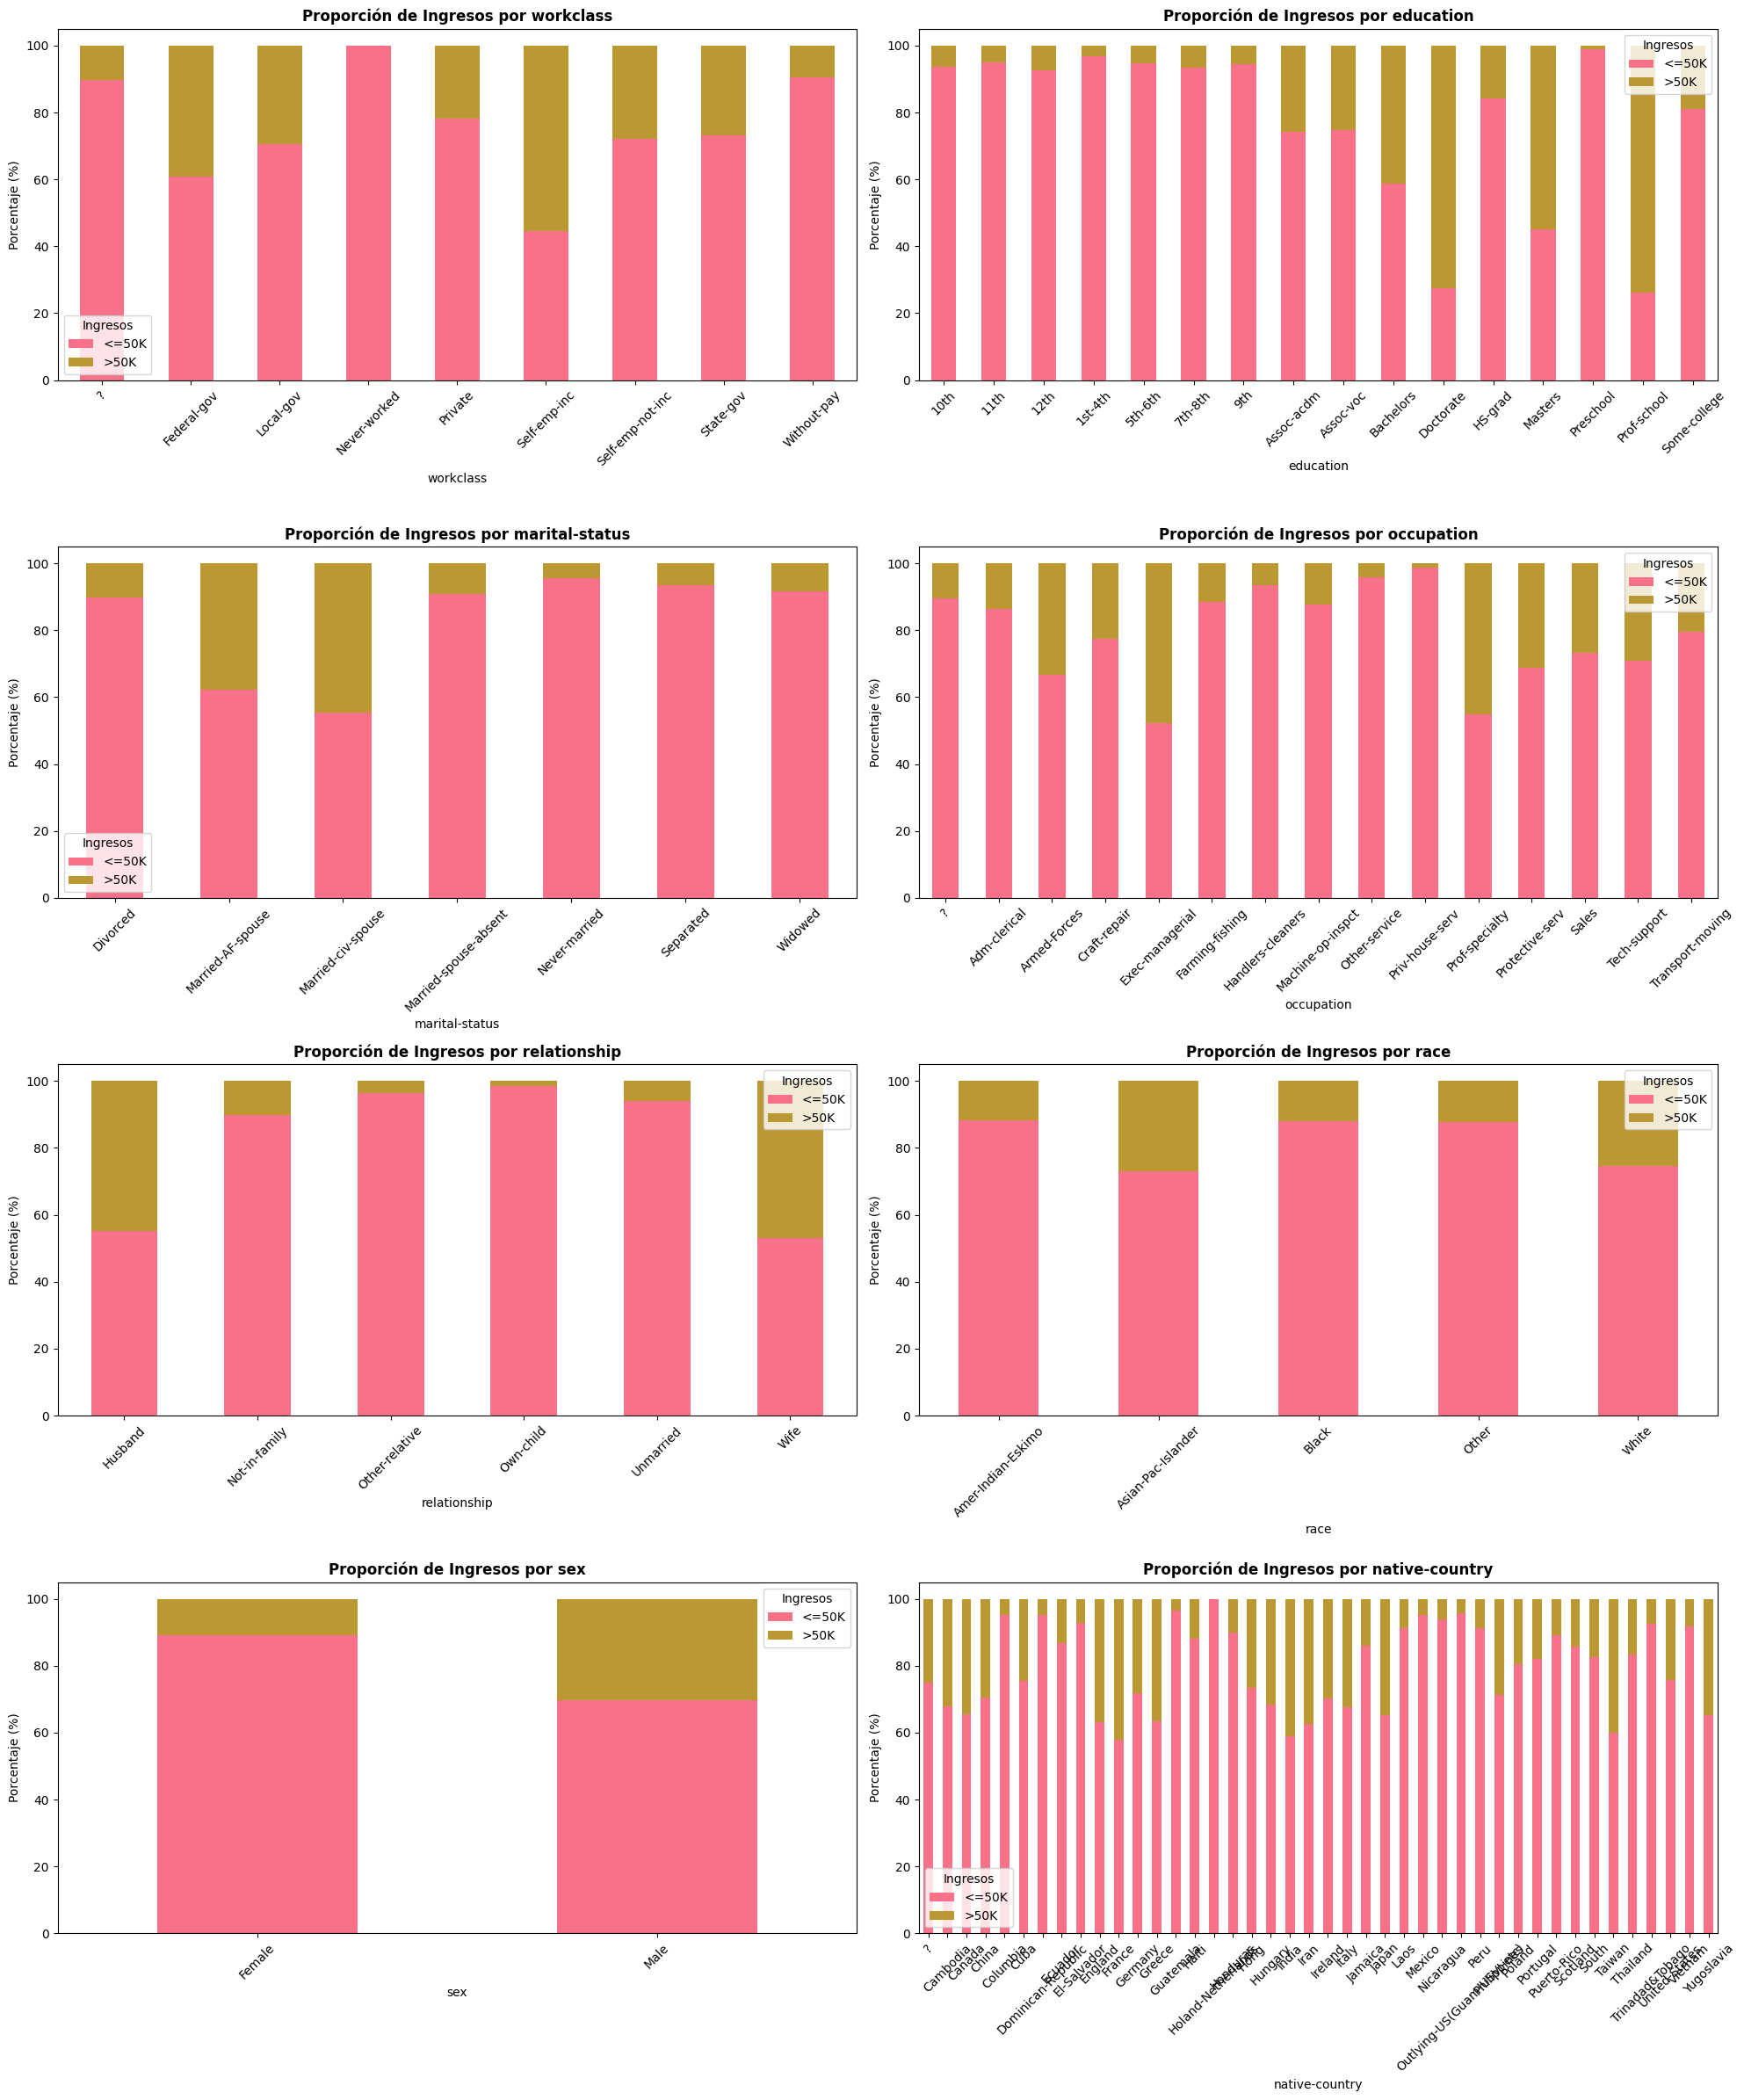

In [165]:
fig, axes = plt.subplots(4, 2, figsize=(20, 24))
axes = axes.ravel()

for i, var in enumerate(categorical_vars):
    ax = axes[i]

    # Tabla de contingencia
    contingency = pd.crosstab(data[var], data['income'])
    contingency_pct = pd.crosstab(data[var], data['income'],
                                normalize='index') * 100

    # Gráfico de barras apiladas
    contingency_pct.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Proporción de Ingresos por {var}',
                fontsize=12, fontweight='bold')
    ax.set_xlabel(var)
    ax.set_ylabel('Porcentaje (%)')
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Ingresos')

plt.tight_layout()
plt.show()

In [177]:
def cramers_v_calc(x, y):
    """Calcula V de Cramér entre dos variables categóricas"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [167]:
cramers_matrix = pd.DataFrame(index=categorical_vars + ['income'], columns=categorical_vars + ['income'])

In [178]:
all_categorical = categorical_vars + ['income']
cramers_matrix = pd.DataFrame(index=all_categorical, columns=all_categorical)

In [179]:
for var1 in all_categorical:
    for var2 in all_categorical:
        if var1 == var2:
            cramers_matrix.loc[var1, var2] = 1.0
        else:
            try:
                cramers_v = cramers_v_calc(data[var1], data[var2])
                cramers_matrix.loc[var1, var2] = cramers_v
            except:
                cramers_matrix.loc[var1, var2] = 0.0

In [180]:
cramers_matrix = cramers_matrix.astype(float)

In [182]:
target_associations = cramers_matrix['income'].drop('income').sort_values(ascending=False)
for var, value in target_associations.items():
    if value < 0.1:
        strength = "muy débil"
    elif value < 0.2:
        strength = "débil"
    elif value < 0.4:
        strength = "moderada"
    else:
        strength = "fuerte"
    print(f"   {var:15s}: V = {value:.3f} ({strength})")

   relationship   : V = 0.454 (fuerte)
   marital-status : V = 0.448 (fuerte)
   education      : V = 0.365 (moderada)
   occupation     : V = 0.347 (moderada)
   sex            : V = 0.215 (moderada)
   workclass      : V = 0.174 (débil)
   race           : V = 0.099 (muy débil)
   native-country : V = 0.092 (muy débil)


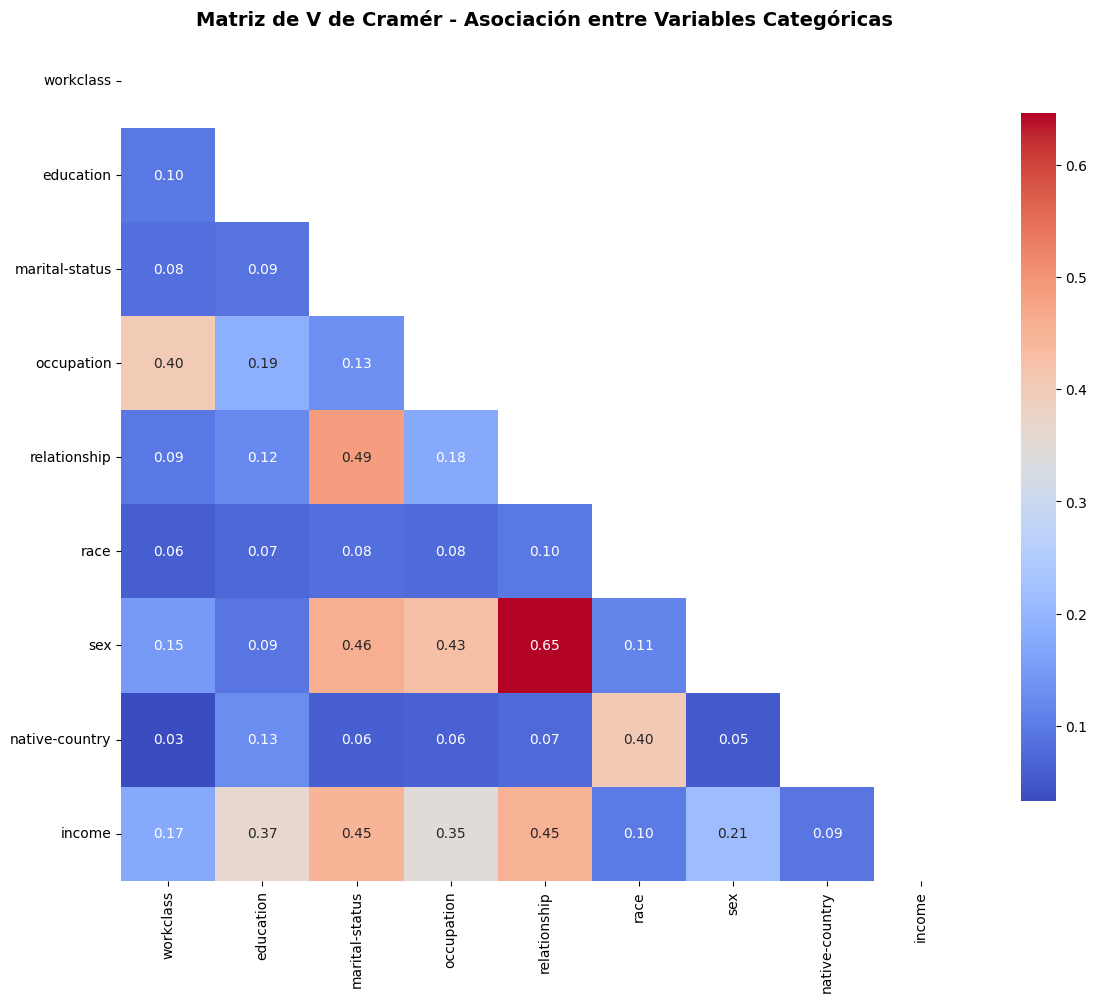

In [183]:
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(cramers_matrix, dtype=bool))
sns.heatmap(cramers_matrix, mask=mask, annot=True, cmap='coolwarm',
           square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Matriz de V de Cramér - Asociación entre Variables Categóricas',
         fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Analisis de sesgos

In [186]:
bias_results = {}

In [187]:
demographic_vars = ['sex', 'race', 'native-country']
for var in demographic_vars:
    print(f"\n📊 Variable: {var.upper()}")
    crosstab = pd.crosstab(data[var], data['income'], normalize='index') * 100
    
    # Mostrar solo categorías con >50 casos para mayor significancia estadística
    category_counts = data[var].value_counts()
    significant_categories = category_counts[category_counts >= 50].index
    
    filtered_crosstab = crosstab.loc[significant_categories]
    
    print("   % con ingresos >50K por categoría:")
    high_income_pct = filtered_crosstab['>50K'].sort_values(ascending=False)
    
    for category, pct in high_income_pct.items():
        count = category_counts[category]
        print(f"     {category:25s}: {pct:6.2f}% (n={count:,})")
    
    # Calcular disparidad (ratio max/min)
    max_pct = high_income_pct.max()
    min_pct = high_income_pct.min()
    disparity_ratio = max_pct / min_pct if min_pct > 0 else float('inf')
    
    print(f"   📈 Ratio de disparidad: {disparity_ratio:.2f}:1")
    if disparity_ratio > 2:
        print("   ⚠️  SESGO SIGNIFICATIVO DETECTADO")
    
    bias_results[var] = {
        'crosstab': filtered_crosstab,
        'disparity_ratio': disparity_ratio,
        'high_income_pct': high_income_pct
    }


📊 Variable: SEX
   % con ingresos >50K por categoría:
     Male                     :  30.38% (n=32,650)
     Female                   :  10.93% (n=16,192)
   📈 Ratio de disparidad: 2.78:1
   ⚠️  SESGO SIGNIFICATIVO DETECTADO

📊 Variable: RACE
   % con ingresos >50K por categoría:
     Asian-Pac-Islander       :  26.93% (n=1,519)
     White                    :  25.40% (n=41,762)
     Other                    :  12.32% (n=406)
     Black                    :  12.08% (n=4,685)
     Amer-Indian-Eskimo       :  11.70% (n=470)
   📈 Ratio de disparidad: 2.30:1
   ⚠️  SESGO SIGNIFICATIVO DETECTADO

📊 Variable: NATIVE-COUNTRY
   % con ingresos >50K por categoría:
     India                    :  41.06% (n=151)
     Taiwan                   :  40.00% (n=65)
     Iran                     :  37.29% (n=59)
     England                  :  37.01% (n=127)
     Japan                    :  34.78% (n=92)
     Canada                   :  34.62% (n=182)
     Italy                    :  32.38% (n=105)
 

In [188]:
socioeconomic_vars = ['education', 'workclass', 'occupation']
for var in socioeconomic_vars:
    print(f"\n📊 Variable: {var.upper()}")
    crosstab = pd.crosstab(data[var], data['income'], normalize='index') * 100
    
    high_income_pct = crosstab['>50K'].sort_values(ascending=False)
    
    print("   Top 5 categorías con mayor % de ingresos altos:")
    for category, pct in high_income_pct.head().items():
        count = data[var].value_counts()[category]
        print(f"     {category:30s}: {pct:6.2f}% (n={count:,})")
    
    print("   Bottom 3 categorías con menor % de ingresos altos:")
    for category, pct in high_income_pct.tail(3).items():
        count = data[var].value_counts()[category]
        print(f"     {category:30s}: {pct:6.2f}% (n={count:,})")
    
    bias_results[var] = {
        'high_income_pct': high_income_pct,
        'top_categories': high_income_pct.head(),
        'bottom_categories': high_income_pct.tail(3)
    }


📊 Variable: EDUCATION
   Top 5 categorías con mayor % de ingresos altos:
     Prof-school                   :  73.98% (n=834)
     Doctorate                     :  72.56% (n=594)
     Masters                       :  54.91% (n=2,657)
     Bachelors                     :  41.28% (n=8,025)
     Assoc-acdm                    :  25.80% (n=1,601)
   Bottom 3 categorías con menor % de ingresos altos:
     11th                          :   5.08% (n=1,812)
     1st-4th                       :   3.24% (n=247)
     Preschool                     :   1.20% (n=83)

📊 Variable: WORKCLASS
   Top 5 categorías con mayor % de ingresos altos:
     Self-emp-inc                  :  55.34% (n=1,695)
     Federal-gov                   :  39.18% (n=1,432)
     Local-gov                     :  29.56% (n=3,136)
     Self-emp-not-inc              :  27.89% (n=3,862)
     State-gov                     :  26.75% (n=1,981)
   Bottom 3 categorías con menor % de ingresos altos:
     ?                             :  

In [189]:
family_vars = ['marital-status', 'relationship']

for var in family_vars:
    print(f"\n📊 Variable: {var.upper()}")
    crosstab = pd.crosstab(data[var], data['income'], normalize='index') * 100
    
    high_income_pct = crosstab['>50K'].sort_values(ascending=False)
    
    for category, pct in high_income_pct.items():
        count = data[var].value_counts()[category]
        print(f"     {category:25s}: {pct:6.2f}% (n={count:,})")
    
    bias_results[var] = {'high_income_pct': high_income_pct}


📊 Variable: MARITAL-STATUS
     Married-civ-spouse       :  44.61% (n=22,379)
     Married-AF-spouse        :  37.84% (n=37)
     Divorced                 :  10.12% (n=6,633)
     Married-spouse-absent    :   9.24% (n=628)
     Widowed                  :   8.43% (n=1,518)
     Separated                :   6.47% (n=1,530)
     Never-married            :   4.55% (n=16,117)

📊 Variable: RELATIONSHIP
     Wife                     :  46.89% (n=2,331)
     Husband                  :  44.87% (n=19,716)
     Not-in-family            :  10.14% (n=12,583)
     Unmarried                :   6.03% (n=5,125)
     Other-relative           :   3.45% (n=1,506)
     Own-child                :   1.46% (n=7,581)


In [204]:
for var in ['age', 'hours-per-week', 'education-num']:
    print(f"\n📊 Variable: {var.upper()}")
    
    # Dividir en quintiles con manejo de duplicados
    try:
        quintiles = pd.qcut(data[var], q=5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'], duplicates='drop')
        quintile_ranges = pd.qcut(data[var], q=5, duplicates='drop')

        crosstab = pd.crosstab(quintiles, data['income'], normalize='index') * 100

        print("   % con ingresos >50K por quintil:")

        # Obtener los rangos únicos para cada quintil
        unique_ranges = quintile_ranges.cat.categories

        for i, (quintile, pct) in enumerate(crosstab['>50K'].items()):
            if i < len(unique_ranges):
                range_info = unique_ranges[i]
                print(f"     {quintile}: {pct:6.2f}% (rango: {range_info})")
            else:
                print(f"     {quintile}: {pct:6.2f}%")

        bias_results[f"{var}_quintiles"] = crosstab['>50K']

    except ValueError as e:
        # Si aún hay problemas con quintiles, usar cuartiles o deciles
        print(f"   ⚠️  No se pueden crear 5 quintiles para {var}. Intentando con cuartiles...")

        try:
            quartiles = pd.qcut(data[var], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'], duplicates='drop')
            quartile_ranges = pd.qcut(data[var], q=4, duplicates='drop')

            crosstab = pd.crosstab(quartiles, data['income'], normalize='index') * 100

            print("   % con ingresos >50K por cuartil:")
            unique_ranges = quartile_ranges.cat.categories

            for i, (quartile, pct) in enumerate(crosstab['>50K'].items()):
                if i < len(unique_ranges):
                    range_info = unique_ranges[i]
                    print(f"     {quartile}: {pct:6.2f}% (rango: {range_info})")

            bias_results[f"{var}_quartiles"] = crosstab['>50K']

        except ValueError:
            # Como último recurso, usar percentiles personalizados
            print(f"   ⚠️  Usando análisis por percentiles para {var}")

            # Crear grupos basados en percentiles únicos
            percentiles = [0, 20, 40, 60, 80, 100]
            bins = data[var].quantile([p/100 for p in percentiles]).unique()

            if len(bins) > 1:
                groups = pd.cut(data[var], bins=bins, labels=[f'G{i+1}' for i in range(len(bins)-1)], include_lowest=True)
                crosstab = pd.crosstab(groups, data['income'], normalize='index') * 100

                print("   % con ingresos >50K por grupo:")
                for group, pct in crosstab['>50K'].items():
                    print(f"     {group}: {pct:6.2f}%")

                bias_results[f"{var}_groups"] = crosstab['>50K']
            else:
                print(f"   ❌ No se puede analizar {var} - valores muy homogéneos")



📊 Variable: AGE
   % con ingresos >50K por quintil:
     Q1:   2.36% (rango: (16.999, 26.0])
     Q2:  17.93% (rango: (26.0, 33.0])
     Q3:  31.24% (rango: (33.0, 41.0])
     Q4:  38.71% (rango: (41.0, 51.0])
     Q5:  31.03% (rango: (51.0, 90.0])

📊 Variable: HOURS-PER-WEEK
   ⚠️  No se pueden crear 5 quintiles para hours-per-week. Intentando con cuartiles...
   ⚠️  Usando análisis por percentiles para hours-per-week
   % con ingresos >50K por grupo:
     G1:   8.36%
     G2:  21.03%
     G3:  34.78%
     G4:  42.50%

📊 Variable: EDUCATION-NUM
   ⚠️  No se pueden crear 5 quintiles para education-num. Intentando con cuartiles...
   % con ingresos >50K por cuartil:
     Q1:  12.93% (rango: (0.999, 9.0])
     Q2:  18.96% (rango: (9.0, 10.0])
     Q3:  25.53% (rango: (10.0, 12.0])
     Q4:  48.06% (rango: (12.0, 16.0])


In [205]:
for var in ['age', 'hours-per-week', 'education-num']:
    print(f"\n📊 Variable: {var.upper()}")

    # Estadísticas básicas por grupo de ingresos
    low_income = data[data['income'] == '<=50K'][var]
    high_income = data[data['income'] == '>50K'][var]

    print(f"   Estadísticas descriptivas:")
    print(f"     <=50K - Media: {low_income.mean():.2f}, Mediana: {low_income.median():.2f}")
    print(f"     >50K  - Media: {high_income.mean():.2f}, Mediana: {high_income.median():.2f}")

    # Intentar análisis por quintiles con manejo robusto
    unique_values = data[var].nunique()

    if unique_values >= 10:  # Suficientes valores únicos para quintiles
        try:
            # Método más robusto: crear bins personalizados
            percentiles = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
            quantile_values = data[var].quantile(percentiles).values

            # Asegurar que los bins sean únicos
            unique_quantiles = pd.Series(quantile_values).drop_duplicates().sort_values()

            if len(unique_quantiles) >= 3:  # Al menos 2 grupos
                labels = [f'Q{i+1}' for i in range(len(unique_quantiles)-1)]
                groups = pd.cut(data[var], bins=unique_quantiles, labels=labels, include_lowest=True)

                crosstab = pd.crosstab(groups, data['income'], normalize='index') * 100

                print("   % con ingresos >50K por grupo:")
                for group, pct in crosstab['>50K'].items():
                    # Encontrar el rango del grupo
                    group_idx = crosstab.index.get_loc(group)
                    min_val = unique_quantiles.iloc[group_idx]
                    max_val = unique_quantiles.iloc[group_idx + 1]
                    print(f"     {group}: {pct:6.2f}% (rango: {min_val:.1f} - {max_val:.1f})")

                bias_results[f"{var}_analysis"] = crosstab['>50K']

        except Exception as e:
            print(f"   ⚠️  Error en análisis por grupos: {str(e)}")

    else:
        print(f"   ℹ️  Variable con pocos valores únicos ({unique_values}). Mostrando distribución:")
        value_income = pd.crosstab(data[var], data['income'], normalize='index') * 100

        for value, pct in value_income['>50K'].items():
            count = data[var].value_counts()[value]
            print(f"     {value}: {pct:6.2f}% con >50K (n={count:,})")

    print()


📊 Variable: AGE
   Estadísticas descriptivas:
     <=50K - Media: 36.87, Mediana: 34.00
     >50K  - Media: 44.28, Mediana: 43.00
   % con ingresos >50K por grupo:
     Q1:   2.36% (rango: 17.0 - 26.0)
     Q2:  17.93% (rango: 26.0 - 33.0)
     Q3:  31.24% (rango: 33.0 - 41.0)
     Q4:  38.71% (rango: 41.0 - 51.0)
     Q5:  31.03% (rango: 51.0 - 90.0)


📊 Variable: HOURS-PER-WEEK
   Estadísticas descriptivas:
     <=50K - Media: 38.84, Mediana: 40.00
     >50K  - Media: 45.45, Mediana: 40.00
   % con ingresos >50K por grupo:
     Q1:   8.36% (rango: 1.0 - 35.0)
     Q2:  21.03% (rango: 35.0 - 40.0)
     Q3:  34.78% (rango: 40.0 - 48.0)
     Q4:  42.50% (rango: 48.0 - 99.0)


📊 Variable: EDUCATION-NUM
   Estadísticas descriptivas:
     <=50K - Media: 9.60, Mediana: 9.00
     >50K  - Media: 11.60, Mediana: 12.00
   % con ingresos >50K por grupo:
     Q1:  12.93% (rango: 1.0 - 9.0)
     Q2:  18.96% (rango: 9.0 - 10.0)
     Q3:  36.35% (rango: 10.0 - 13.0)
     Q4:  61.37% (rango: 13.0 - 

In [191]:
intersections = [
    ('sex', 'race'),
    ('sex', 'education'),
    ('marital-status', 'sex'),
    ('workclass', 'education')
]

for var1, var2 in intersections:
    print(f"\n📊 Intersección: {var1.upper()} × {var2.upper()}")
    
    # Filtrar solo combinaciones con >20 casos
    intersection_counts = pd.crosstab([data[var1], data[var2]], data['income'])
    significant_combinations = intersection_counts[intersection_counts.sum(axis=1) >= 20]
    
    if len(significant_combinations) > 0:
        intersection_pct = pd.crosstab([data[var1], data[var2]], 
                                     data['income'], normalize='index') * 100
        
        intersection_pct = intersection_pct.loc[significant_combinations.index]
        top_combinations = intersection_pct['>50K'].sort_values(ascending=False).head(5)
        
        print("   Top 5 combinaciones con mayor % de ingresos altos:")
        for (cat1, cat2), pct in top_combinations.items():
            count = intersection_counts.loc[(cat1, cat2)].sum()
            print(f"     {cat1} + {cat2}: {pct:6.2f}% (n={count})")



📊 Intersección: SEX × RACE
   Top 5 combinaciones con mayor % de ingresos altos:
     Male + Asian-Pac-Islander:  33.93% (n=1002)
     Male + White:  31.55% (n=28735)
     Male + Black:  18.26% (n=2377)
     Male + Other:  15.54% (n=251)
     Male + Amer-Indian-Eskimo:  14.04% (n=285)

📊 Intersección: SEX × EDUCATION
   Top 5 combinaciones con mayor % de ingresos altos:
     Male + Prof-school:  78.92% (n=702)
     Male + Doctorate:  76.30% (n=481)
     Male + Masters:  64.51% (n=1812)
     Female + Doctorate:  56.64% (n=113)
     Male + Bachelors:  50.32% (n=5548)

📊 Intersección: MARITAL-STATUS × SEX
   Top 5 combinaciones con mayor % de ingresos altos:
     Married-civ-spouse + Female:  44.80% (n=2480)
     Married-civ-spouse + Male:  44.59% (n=19899)
     Married-AF-spouse + Female:  40.00% (n=25)
     Widowed + Male:  20.70% (n=285)
     Divorced + Male:  15.08% (n=2632)

📊 Intersección: WORKCLASS × EDUCATION
   Top 5 combinaciones con mayor % de ingresos altos:
     Self-emp-inc

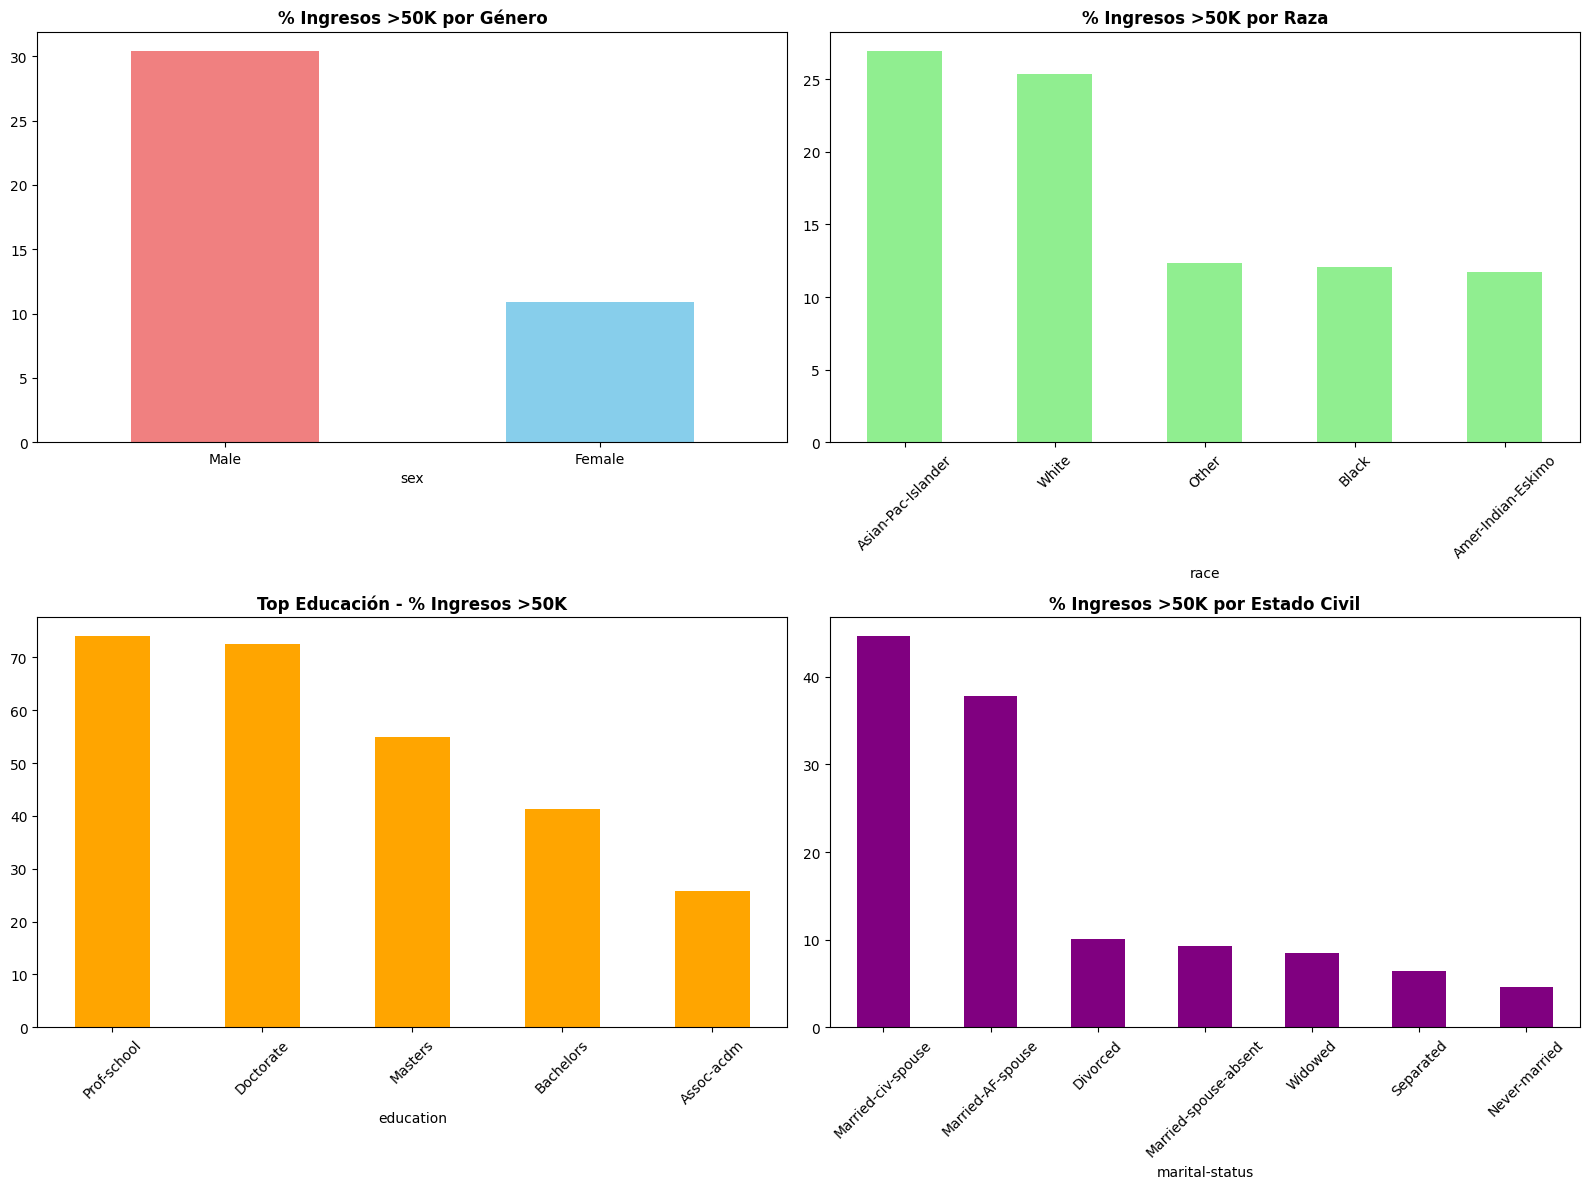

In [192]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Género
if 'sex' in bias_results:
    bias_results['sex']['high_income_pct'].plot(kind='bar', ax=axes[0,0], color=['lightcoral', 'skyblue'])
    axes[0,0].set_title('% Ingresos >50K por Género', fontweight='bold')
    axes[0,0].tick_params(axis='x', rotation=0)

# Raza (top 8 categorías)
if 'race' in bias_results:
    bias_results['race']['high_income_pct'].plot(kind='bar', ax=axes[0,1], color='lightgreen')
    axes[0,1].set_title('% Ingresos >50K por Raza', fontweight='bold')
    axes[0,1].tick_params(axis='x', rotation=45)

# Educación (top 8 categorías)
if 'education' in bias_results:
    bias_results['education']['top_categories'].plot(kind='bar', ax=axes[1,0], color='orange')
    axes[1,0].set_title('Top Educación - % Ingresos >50K', fontweight='bold')
    axes[1,0].tick_params(axis='x', rotation=45)

# Estado civil
if 'marital-status' in bias_results:
    bias_results['marital-status']['high_income_pct'].plot(kind='bar', ax=axes[1,1], color='purple')
    axes[1,1].set_title('% Ingresos >50K por Estado Civil', fontweight='bold')
    axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Preprocesamiento y almacenamiento de dataset a usar con modelo

In [193]:
processed_data = data.copy()

In [195]:
for col in processed_data.columns:
    if processed_data[col].dtype == 'object':
        # Reemplazar '?' con NaN y luego con la moda
        processed_data[col] = processed_data[col].replace('?', np.nan)
        if processed_data[col].isnull().sum() > 0:
            mode_val = processed_data[col].mode()[0]
            processed_data[col].fillna(mode_val, inplace=True)

In [196]:
selected_features = [
    'age', 'workclass', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain',
    'capital-loss', 'hours-per-week', 'native-country'
]

In [197]:
X_processed = processed_data[selected_features].copy()
y_processed = processed_data['income'].copy()

In [199]:
X_processed.to_csv(f'data/X_processed.csv', index=False)
y_processed.to_csv(f'data/y_processed.csv', index=False)

In [200]:
complete_dataset = pd.concat([X_processed, y_processed], axis=1)
complete_dataset.to_csv(f'data/census_income_clean.csv', index=False)

In [201]:
metadata = {
'timestamp': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
'original_shape': data.shape,
'processed_shape': complete_dataset.shape,
'selected_features': list(X_processed.columns),
'target_variable': 'income',
'target_classes': list(y_processed.unique()),
'categorical_variables': list(X_processed.select_dtypes(include=['object']).columns),
'numerical_variables': list(X_processed.select_dtypes(exclude=['object']).columns)
}

In [203]:
import json
with open(f'data/processing_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)